# Vector Field Plotter

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

%matplotlib widget

## 2D vector fields

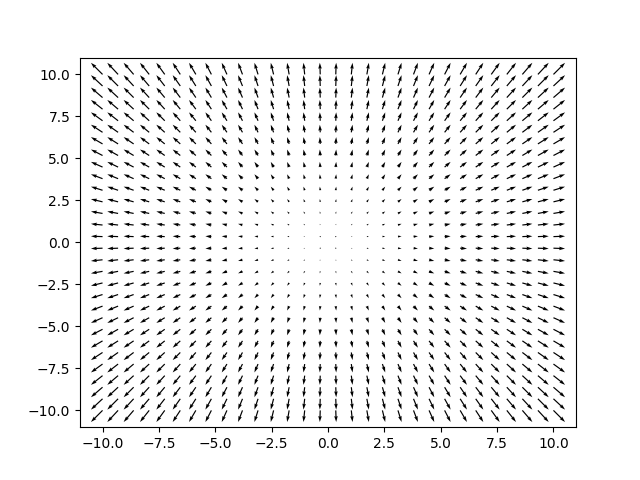

In [2]:
def f1(x, y, t=0):
  omega = 2 * np.pi / 5
  return np.cos(omega * t) * np.array([
    -np.sin(y),
    np.cos(x),
  ])
  # return (x * np.cos(omega * t), y * np.cos(omega * t))
  # return np.array([-r[1], r[0]])

def f2(x, y, t=0):
  return np.array([-y, x])

def f3(x, y, t=0):
  omega = 2 * np.pi / 5
  return np.array([-y, x]) * (np.cos(omega * t) + 0.5)

def f4(x, y, t=0):
  return np.array([5, 0])

def f5(x, y, t=0):
  return np.array([x, y])

def f6(x, y, t=0):
  return 5 * np.array([
    -np.sin(y),
    np.cos(x),
  ])

def f7(x, y, t=0):
  # solenoidal component + irrotational component
  return np.array([-y, x]) + 0.2 * np.array([x, y])

def f8(x, y, t=0):
  # numerically unstable near (0, 0) because vector magnitude approaches infinity
  return np.array([-y, x]) / np.sqrt(x**2 + y**2)

# TODO: prove/disprove conjecture: a particle at any location in this field will trace out a circle
def f9(x, y, t=0):
  omega = 2 * np.pi / 5
  rotation_matrix = np.array([
    [np.cos(omega * t), -np.sin(omega * t)],
    [np.sin(omega * t), np.cos(omega * t)],
  ])
  return np.tensordot(rotation_matrix, np.array([x, y]), axes=(1, 0))

x, y = np.meshgrid(np.linspace(-10, 10, 30), np.linspace(-10, 10, 30))

# plot
plt.clf()

plt.quiver(x, y, *f9(x, y))

# curl_deriv_null_x = (np.arange(-3, 3, 1) + 0.5) * np.pi
# curl_deriv_null_y = np.arange(-3, 4, 1) * np.pi
# plt.scatter(*np.meshgrid(curl_deriv_null_x, curl_deriv_null_y), marker="o")

plt.show()

### Animation

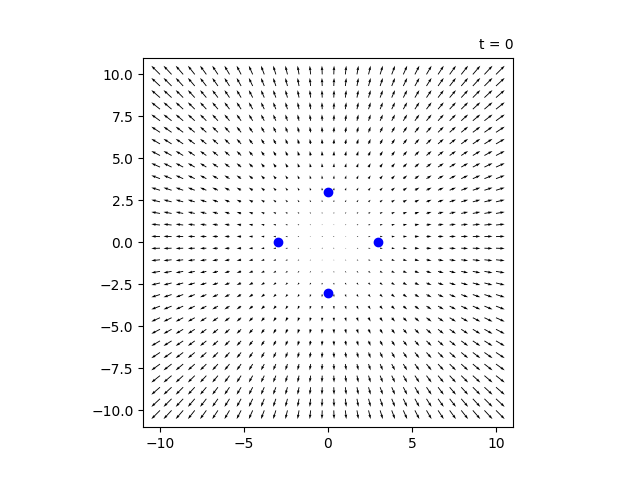

0.0
0.0
0.01
0.02
1.0
1.01
1.02
2.0
2.0100000000000002
2.02
3.0
3.0100000000000002
3.02
4.0
4.01
4.0200000000000005
5.0
5.01
5.0200000000000005
6.0
6.01
6.0200000000000005
7.0
7.01
7.0200000000000005
8.0
8.01
8.02
8.03
9.0
9.01
9.02
9.03
10.0
10.01
10.02
10.03
11.0
11.01
11.02
11.03
12.0
12.01
12.02
13.0
13.01
13.02
14.0
14.01
14.02
15.0
15.01
15.02
16.0
16.01
16.02
17.0
17.01
17.02
18.0
18.01
18.02
19.0
19.01
19.02


In [5]:
fig, ax = plt.subplots()

dt = 0.01
x, y = np.meshgrid(np.linspace(-10, 10, 30), np.linspace(-10, 10, 30))

field_to_animate = f9

quiver = plt.quiver(x, y, *field_to_animate(x, y))
# particle_positions = np.array([
#   [3, 5],
#   [-1, -4],
#   [-2, 6],
#   [4, -1],
# ], dtype=np.float64)
particle_positions = np.array([
  [-3, 0],
  [0, -3],
  [3, 0],
  [0, 3],
], dtype=np.float64)
particles = plt.plot(*particle_positions.T, "bo")[0]
time_text = plt.text(9, 11.5, "t = 0")

def animate(t):
  if np.abs(t - math.floor(t)) < 0.03:
    print(t)

  quiver.set_UVC(*field_to_animate(x, y, t))

  global particle_positions
  particle_positions += dt * field_to_animate(*particle_positions.T, t).T
  particles.set_data(*particle_positions.T)

  time_text.set_text(f"t = {t:.2f}")

animation = FuncAnimation(fig,
                          func=animate,
                          frames=np.arange(0, 20, dt),
                          interval=dt*1000,
                          blit=False)
ax.set_aspect("equal")
plt.show()

animation.save("animation.mp4")

## 3D vector fields

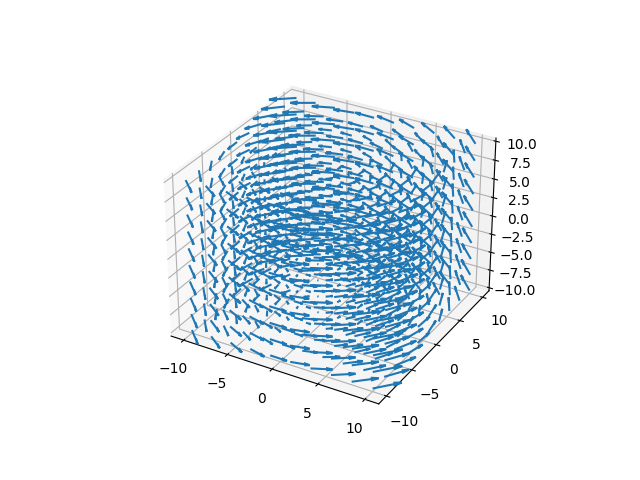

In [6]:
def f1_3d(x, y, z, t=0):
  assert x.shape == y.shape
  return np.array([-y, x, np.ones(x.shape)])

fig = plt.figure()
ax_3d = fig.add_subplot(projection="3d")

x, y, z = np.meshgrid(np.linspace(-10, 10, 10),
                      np.linspace(-10, 10, 10),
                      np.linspace(-10, 10, 10))

ax_3d.cla()

ax_3d.quiver(x, y, z, *f1_3d(x, y, z), length=0.2)
plt.show()

### Animation

4.0
4.01
4.0200000000000005


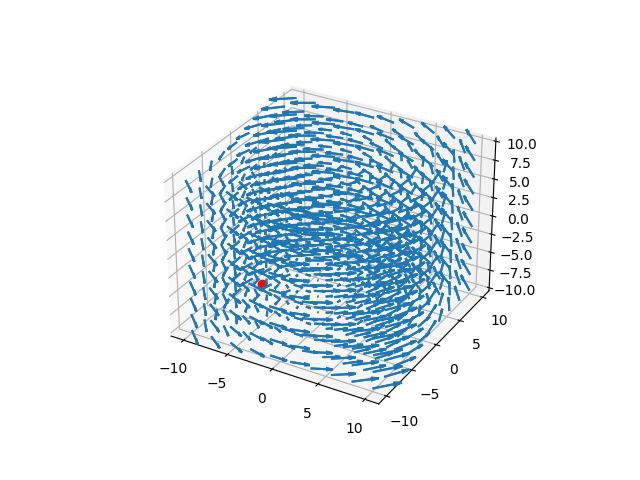

0.0
0.0


ValueError: Collections can only map rank 1 arrays

In [7]:
dt = 0.01
x, y, z = np.meshgrid(np.linspace(-10, 10, 10),
                      np.linspace(-10, 10, 10),
                      np.linspace(-10, 10, 10))

field_to_animate = f1_3d

quiver = ax_3d.quiver(x, y, z, *field_to_animate(x, y, z), length=0.2)
particle_positions = np.array([
  [-5, -5, -5]
], dtype=np.float64)
particles = plt.plot(*particle_positions.T, "ro")[0]
# time_text = plt.text(9, 11.5, "t = 0")

# TODO: add tqdm progress bar to indicate render progress
def animate_3d(t):
  if np.abs(t - math.floor(t)) < 0.03:
    print(t)

  # quiver.set(*field_to_animate(x, y, z, t))

  global particle_positions
  particle_positions += dt * field_to_animate(*particle_positions.T, t).T
  particles.set_data_3d(*particle_positions.T)

  # time_text.set_text(f"t = {t:.2f}")

animation_3d = FuncAnimation(fig,
                             func=animate_3d,
                             frames=np.arange(0, 10, dt),
                             interval=dt*1000,
                             blit=False)

# Axes3D doesn't support square/cube aspect ratio
# ax.set_aspect("equal")

plt.show()

animation_3d.save("animation_3d.mp4")